In [76]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

mat = scipy.io.loadmat(r'C:\Users\raine\Downloads\Data Science\DATA\cam1_1.mat')
print(mat.keys())


dict_keys(['__header__', '__version__', '__globals__', 'vidFrames1_1'])


In [77]:
video_data = mat['vidFrames1_1']
for frame_index in range(200):
    frame = video_data[:, :, :, frame_index]
    plt.imshow(frame)
    plt.axis('off')
    plt.show()
    clear_output(wait=True)

KeyboardInterrupt: 

In [78]:
m = video_data.shape[0] * video_data.shape[1] * video_data.shape[2]
n = video_data.shape[3]
A = np.ndarray((m,n))
for frame_index in range(n):
    frame = video_data[:, :, :, frame_index]
    frame = frame.reshape(-1)
    A[:, frame_index] = frame
print(A.shape)


(921600, 226)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


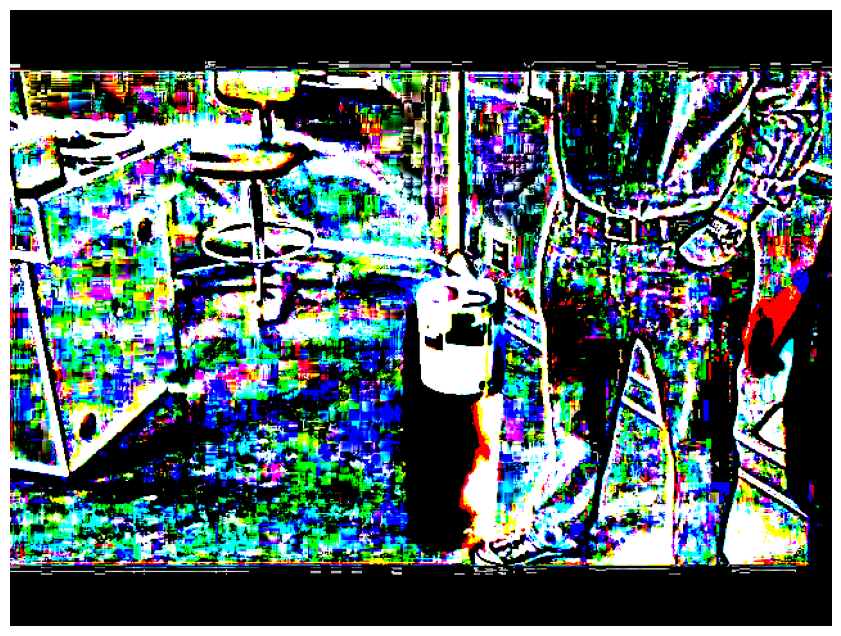

In [79]:
mean_A = np.mean(A, axis=1)
meansubA = A - mean_A[:, np.newaxis]

for frame_index in range(10):
    frame = meansubA[:,frame_index].reshape(480,640,3)
    plt.imshow(frame)
    plt.axis('off')
    plt.show()
    clear_output(wait=True)


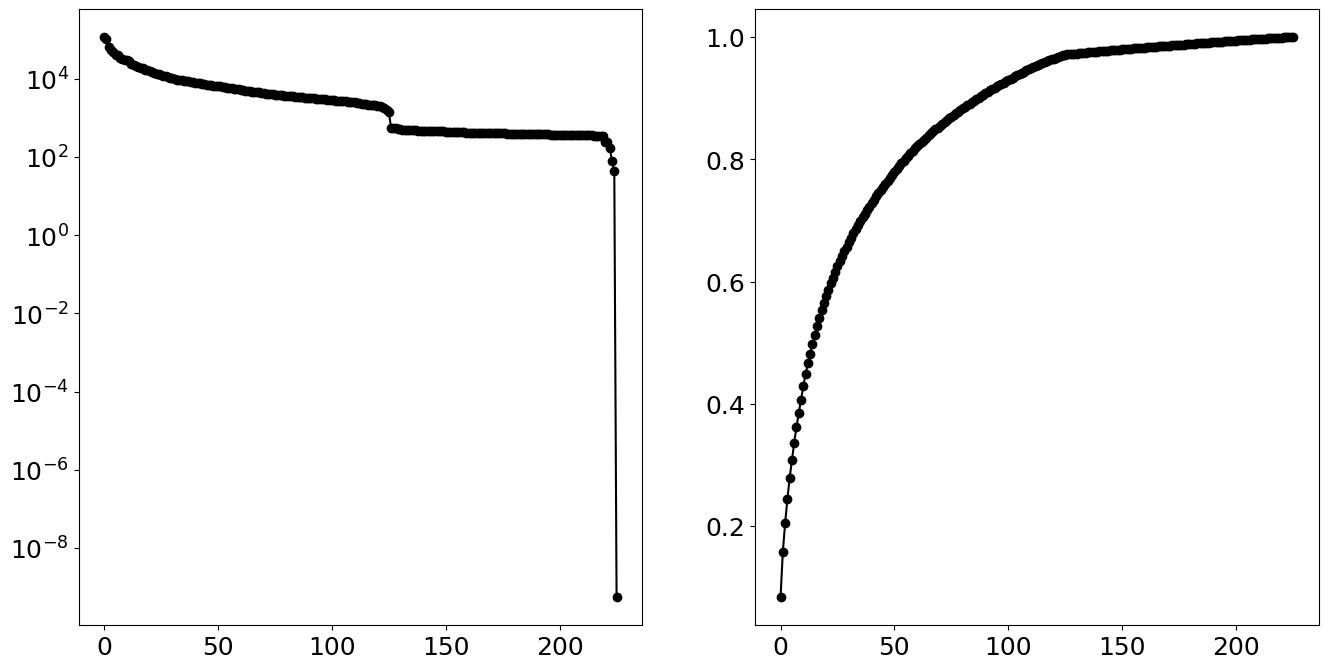

In [80]:
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size': 18})


U, S, VT = np.linalg.svd(meansubA, full_matrices=0)

fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
ax1.semilogy(S,'-o',color='k')
ax2 = fig1.add_subplot(122)
ax2.plot(np.cumsum(S)/np.sum(S),'-o',color='k')

plt.show()



-927.8091347526405 419.22834466650943 262.6564207945298
-927.8091347526405 419.22834466650943 262.6564207945298
-927.8091347526405 419.22834466650943 262.6564207945298
-927.8091347526405 419.22834466650943 262.6564207945298
-927.8091347526405 419.22834466650943 262.6564207945298
-927.8091347526405 419.22834466650943 262.6564207945298
-927.8091347526405 419.22834466650943 262.6564207945298
-927.8091347526405 419.22834466650943 262.6564207945298
-927.8091347526405 419.22834466650943 262.6564207945298
-927.8091347526405 419.22834466650943 262.6564207945298
-927.8091347526405 419.22834466650943 262.6564207945298
-927.8091347526405 419.22834466650943 262.6564207945298
-927.8091347526405 419.22834466650943 262.6564207945298
-927.8091347526405 419.22834466650943 262.6564207945298
-927.8091347526405 419.22834466650943 262.6564207945298
-927.8091347526405 419.22834466650943 262.6564207945298
-927.8091347526405 419.22834466650943 262.6564207945298
-927.8091347526405 419.22834466650943 262.656420

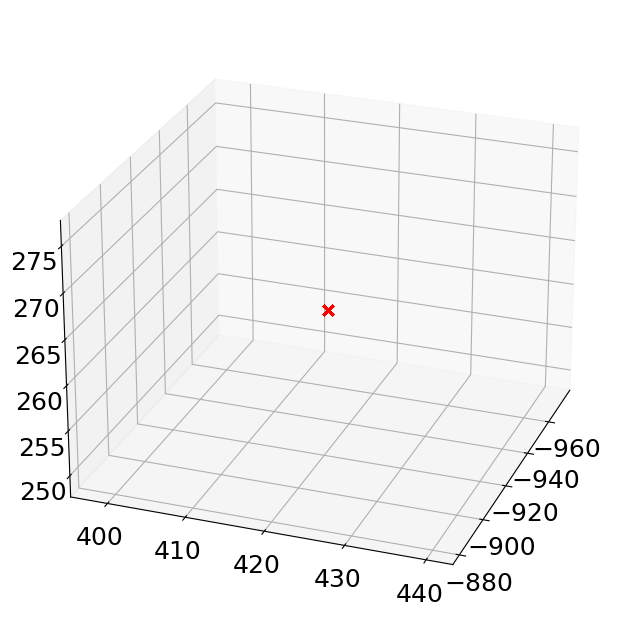

In [99]:
fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')

# Iterate over all frames (assuming each frame is a row in meansubA)
for j in range(n):  # n should be the number of frames
    # Transform a single frame using U
    single_frame_transformed = U.T @ meansubA[:, n-1]

    # Now you can project this transformed frame onto the principal components
    x = VT[0, :] @ single_frame_transformed
    y = VT[1, :] @ single_frame_transformed
    z = VT[2, :] @ single_frame_transformed
    print(x,y,z)
    ax.scatter(x, y, z, marker='x', color='r', s=50)

ax.view_init(25, 20)
plt.show()


In [100]:
# Lists to accumulate coordinates
x_points = []
y_points = []
z_points = []

# Project each frame onto the principal components
for j in range(meansubA.shape[1]):  # iterate over all columns/frames
    single_frame_transformed = U.T @ meansubA[:, j]
    x = VT[0, :] @ single_frame_transformed
    y = VT[1, :] @ single_frame_transformed
    z = VT[2, :] @ single_frame_transformed

    # Accumulate the coordinates
    x_points.append(x)
    y_points.append(y)
    z_points.append(z)

# Now x_points, y_points, and z_points contain the projections
# of all frames onto the first three principal components


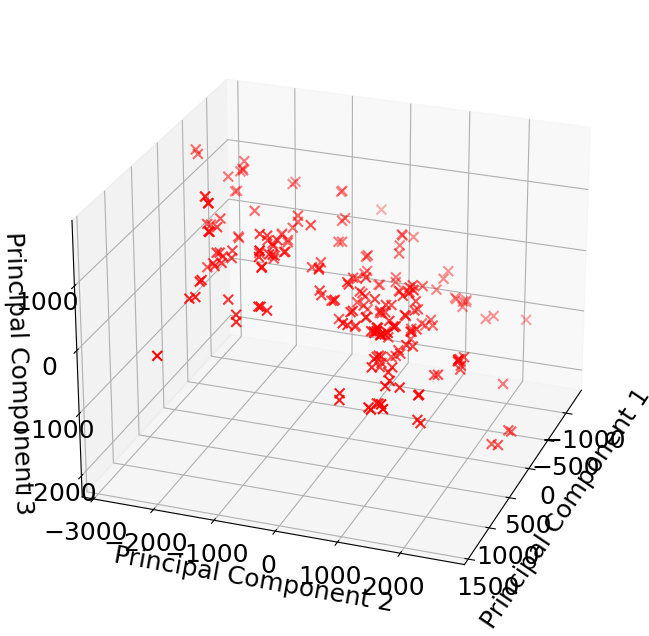

In [101]:
fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')

# Plot all points at once
ax.scatter(x_points, y_points, z_points, marker='x', color='r', s=50)

# Set up the axes labels
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Set up the viewpoint
ax.view_init(25, 20)

# Show the plot
plt.show()


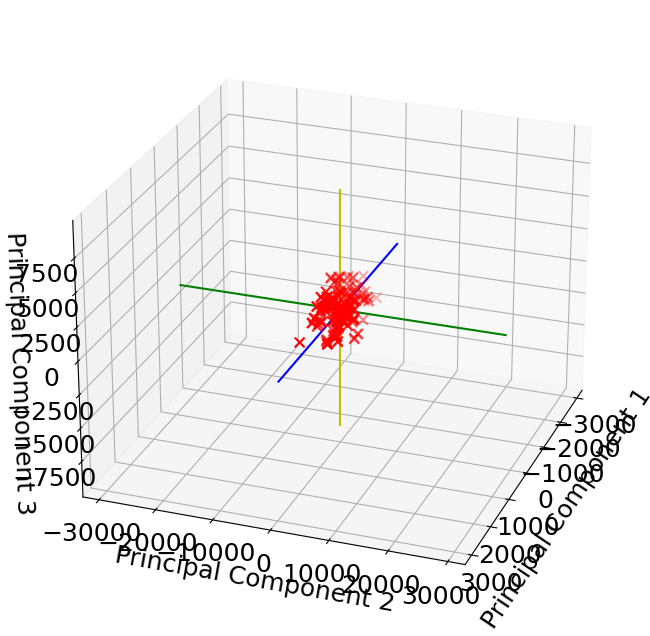

In [102]:
fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')

# Plot all points at once
ax.scatter(x_points, y_points, z_points, marker='x', color='r', s=50)

# Set up the axes labels
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Set up the viewpoint
ax.view_init(25, 20)

# Show the plot
plt.show()


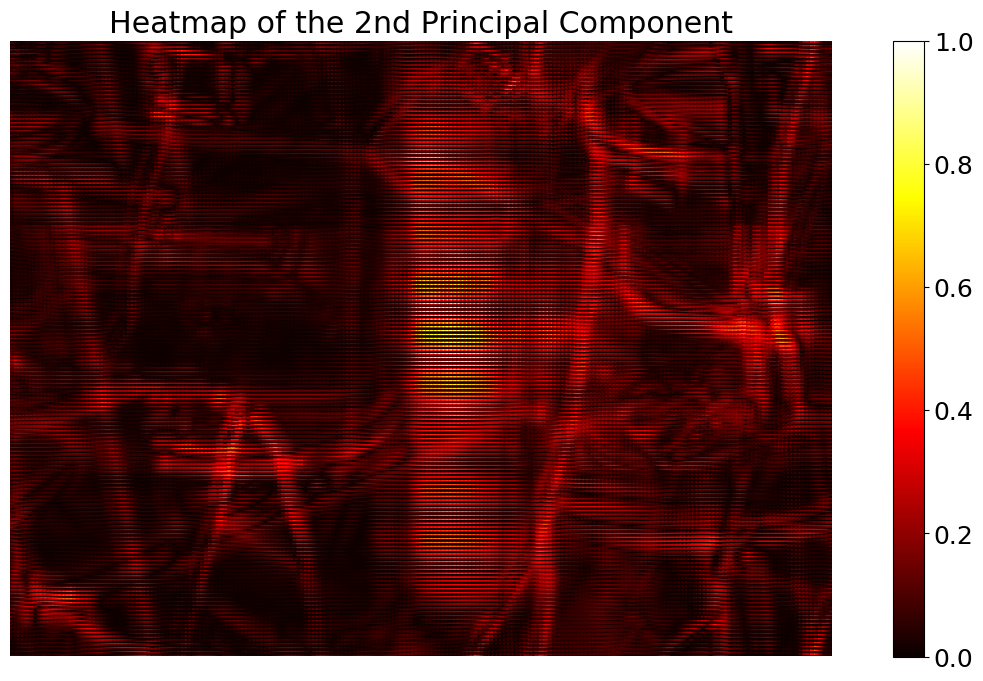

In [122]:
# Assuming 'U' is the matrix with principal components as columns
# and 'A' is the original data matrix

# Get the first principal component
pc1 = U[:, 2]

# Since 'pc1' represents a combination of all the pixels across all frames,
# we'll sum the absolute values of the weights across the frames to get a single frame's worth of data
pc1_sum = np.sum(np.abs(pc1.reshape(-1, 480,640)), axis=0)

# Reshape this sum to the frame's dimensions (assuming the video is grayscale)
pc1_image = pc1_sum.reshape((480,640))

# Normalize the image for visualization
pc1_image_normalized = (pc1_image - np.min(pc1_image)) / (np.max(pc1_image) - np.min(pc1_image))

# Plot the heatmap
plt.imshow(pc1_image_normalized, cmap='hot')
plt.colorbar()
plt.title('Heatmap of the 2nd Principal Component')
plt.axis('off')  # Turn off the axis
plt.show()
